In [1]:
"""
Purpose: To identify all of the merged on axons
and the actual axon of a neuron

"""

'\nPurpose: To identify all of the merged on axons\nand the actual axon of a neuron\n\n'

# Loading the neuron object

In [2]:
from os import sys
#sys.path.append("../../meshAfterParty/")
sys.path.append("../../meshAfterParty/meshAfterParty")
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)

In [3]:
import system_utils as su
uncompressed_neuron = su.load_object("../test_neurons/test_objects/12345_2_soma_practice_decompress.pkl")

In [5]:
import neuron_visualizations as nviz

In [6]:
nviz.plot_spines(uncompressed_neuron)


 Working on visualization type: mesh


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Portion that will search and find all of the axon parts

In [10]:
#Making sure the function_kwargs works
import neuron_searching as ns
ns = reload(ns)
current_functions_list = [
    "spines_per_skeletal_length",
    "no_spine_width",
    "n_spines",
    "n_faces_branch",
    
]

limb_branch_dict = ns.query_neuron(uncompressed_neuron,
                                   query="n_spines < 5 and no_spine_width < 400",
               functions_list=current_functions_list)

current_functions_list = ["test_limb"]
# How to give a limb_branch_dict as an argument
# limb_branch_dict = ns.query_neuron(uncompressed_neuron,
#                                    query="test_limb==5",
#                                    function_kwargs=dict(limb_branch_dict =limb_branch_dict),
#                        functions_list=current_functions_list)


limb_branch_dict

{'L0': array([ 1,  4,  5,  6,  7,  8, 10, 11, 13, 14, 16, 24, 26, 27, 29, 31, 36,
        37, 40, 44, 55, 58, 64, 66, 68, 70, 71]),
 'L1': array([ 1,  3,  5,  6,  8, 13, 16, 18, 19, 20, 21, 22, 25, 26, 29, 36, 39,
        41, 43, 44, 46, 47, 50, 51]),
 'L2': array([ 3,  4,  9, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28,
        29, 30, 31, 32, 35, 36, 37, 38, 39, 40]),
 'L3': array([ 4,  6,  8,  9, 10, 11, 13, 15, 16, 17, 18, 21, 22, 27, 28, 29, 32,
        33, 36]),
 'L4': array([ 1,  3,  6,  8, 12, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31]),
 'L5': array([2, 4, 6]),
 'L6': array([ 0,  6,  8, 14]),
 'L7': array([ 3,  5,  6,  9, 11, 13, 14, 18, 20, 21, 23, 24]),
 'L8': array([0, 1, 2, 6, 7, 8]),
 'L9': array([0, 1, 2, 3, 4])}

In [11]:
import neuron_visualizations as nviz
nviz = reload(nviz)


nviz.visualize_neuron(uncompressed_neuron,
                      visualize_type=["mesh"],
                     limb_branch_dict=limb_branch_dict,
                      mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


# Function that will try and filter the spine segments so that it does not disconnect the mesh

In [ ]:
"""
Algorithm: 
For all the branches that contain axon pieces:
1) Get all of the concept maps
2) For each of the concept maps: 
    - For each node: 
        a. Get all of the upstream nodes
        b. Get the total number of faces for all upstream non-axon nodes
        c. If above a certain threshold, then put in list that says it is not axon piece
update the branch dictionary to not include all of those identified as non-axonal

"""

In [48]:
curr_limb_name = "L4"
curr_limb = uncompressed_neuron.concept_network.nodes[curr_limb_name]["data"]
ns = reload(ns)

return_value = ns.axon_segment(curr_limb,limb_branch_dict=limb_branch_dict,
             limb_name=curr_limb_name,downstream_face_threshold=5000,
                 print_flag=False)
return_value

{4: False,
 0: False,
 5: False,
 6: True,
 7: False,
 1: True,
 8: False,
 11: False,
 9: False,
 10: False,
 13: False,
 15: True,
 16: False,
 18: False,
 14: True,
 20: False,
 32: False,
 34: False,
 12: True,
 19: False,
 21: True,
 30: True,
 31: True,
 2: False,
 33: False,
 28: True,
 29: True,
 3: True,
 17: True,
 23: True,
 27: True,
 25: True,
 26: True,
 22: True,
 24: True}

In [58]:
#Making sure the function_kwargs works
import neuron_searching as ns
ns = reload(ns)
current_functions_list = [
    "spines_per_skeletal_length",
    "no_spine_width",
    "n_spines",
    "n_faces_branch",
    
]

limb_branch_dict = ns.query_neuron(uncompressed_neuron,
                                   query="n_spines < 5 and no_spine_width < 400",
               functions_list=current_functions_list)
print(F"limb_branch_dict BEFORE = {limb_branch_dict}")


#How to give a limb_branch_dict as an argument
current_functions_list = ["axon_segment"]
limb_branch_dict_filtered = ns.query_neuron(uncompressed_neuron,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                       print_flag=False),
                                   functions_list=current_functions_list)


print(F"limb_branch_dict AFTER = {limb_branch_dict_filtered}")

limb_branch_dict BEFORE = {'L0': array([ 1,  4,  5,  6,  7,  8, 10, 11, 13, 14, 16, 24, 26, 27, 29, 31, 36,
       37, 40, 44, 55, 58, 64, 66, 68, 70, 71]), 'L1': array([ 1,  3,  5,  6,  8, 13, 16, 18, 19, 20, 21, 22, 25, 26, 29, 36, 39,
       41, 43, 44, 46, 47, 50, 51]), 'L2': array([ 3,  4,  9, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28,
       29, 30, 31, 32, 35, 36, 37, 38, 39, 40]), 'L3': array([ 4,  6,  8,  9, 10, 11, 13, 15, 16, 17, 18, 21, 22, 27, 28, 29, 32,
       33, 36]), 'L4': array([ 1,  3,  6,  8, 12, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31]), 'L5': array([2, 4, 6]), 'L6': array([ 0,  6,  8, 14]), 'L7': array([ 3,  5,  6,  9, 11, 13, 14, 18, 20, 21, 23, 24]), 'L8': array([0, 1, 2, 6, 7, 8]), 'L9': array([0, 1, 2, 3, 4])}
limb_branch_dict AFTER = {'L0': array([ 1,  4,  6,  7, 10, 11, 13, 14, 16, 24, 26, 27, 29, 31, 36, 37, 40,
       44, 55, 58, 64, 66, 68, 70, 71]), 'L1': array([ 1,  3,  5,  6,  8, 13, 16, 18, 19, 20, 21, 22, 25, 26, 2

In [59]:
for curr_key in limb_branch_dict.keys():
    original_set = set(limb_branch_dict[curr_key])
    updated_set = set(limb_branch_dict_filtered[curr_key])
    if  original_set != updated_set:
        print(f"For limb {curr_key} the difference was: {original_set.difference(updated_set)}")

For limb L0 the difference was: {8, 5}
For limb L1 the difference was: {39}
For limb L2 the difference was: {39}
For limb L4 the difference was: {8}
For limb L7 the difference was: {3, 13}
For limb L8 the difference was: {8}


In [60]:
import neuron_visualizations as nviz
nviz = reload(nviz)


nviz.visualize_neuron(uncompressed_neuron,
                      visualize_type=["mesh"],
                     limb_branch_dict=limb_branch_dict_filtered,
                      mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


(array([13., 46., 40., 16.,  6.,  3.,  5.,  6.,  2.,  1.]),
 array([ 48.8338074 ,  80.76850923, 112.70321106, 144.63791289,
        176.57261473, 208.50731656, 240.44201839, 272.37672022,
        304.31142206, 336.24612389, 368.18082572]),
 <a list of 10 Patch objects>)

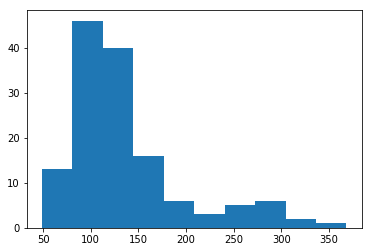

In [74]:
limb_branch_order = []

branch_width = []
for limb_idx,node_list in limb_branch_dict_filtered.items():
    curr_limb_obj = uncompressed_neuron.concept_network.nodes[limb_idx]["data"]
    for branch_idx in node_list:
        branch_object = curr_limb_obj.concept_network.nodes[branch_idx]["data"]
        branch_width.append(branch_object.width_new["no_spine_average"])
        limb_branch_order.append([limb_idx,branch_idx])
        
branch_width = np.array(branch_width)
limb_branch_order = np.array(limb_branch_order)
import matplotlib.pyplot as plt
plt.hist(branch_width)

In [85]:
"""
With the average calculated from the skeleton

Ones to look at: 
L2 25
L7 6  249.5856282069263
L2 21
"""

'\nOnes to look at: \n\n'

In [110]:
arg_sorted_branch_widths = np.flip(np.argsort(branch_width))
ordered_branch_widths = branch_width[arg_sorted_branch_widths]
ordered_limb_branch = limb_branch_order[arg_sorted_branch_widths]

index = 23

curr_limb_idx,curr_branch_idx = ordered_limb_branch[index]
print(curr_limb_idx,curr_branch_idx)
print(f"current_width = {ordered_branch_widths[index]}")

curr_branch = uncompressed_neuron.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]

import skeleton_utils as sk
sk.graph_skeleton_and_mesh(other_meshes=[curr_branch.mesh],
                           other_skeletons=[curr_branch.skeleton],
                          other_meshes_colors=["red"])

L0 66
current_width = 174.73416071202288


In [78]:
uncompressed_neuron.concept_network.nodes["L0"]["data"].concept_network.nodes()

NodeView((46, 28, 47, 21, 27, 53, 56, 14, 20, 57, 59, 70, 71, 17, 18, 52, 60, 13, 15, 51, 58, 39, 61, 12, 16, 25, 49, 63, 64, 9, 11, 19, 24, 48, 54, 55, 65, 8, 10, 42, 50, 45, 62, 5, 7, 40, 43, 66, 67, 3, 6, 41, 44, 68, 69, 2, 4, 22, 38, 0, 1, 34, 36, 32, 33, 23, 72, 30, 35, 29, 31, 26, 37))

# Trying the width calculated from the center fo mass instead of the skeleton midpoint

In [111]:
neuron = reload(neuron)

uncompressed_neuron_revised = neuron.Neuron(uncompressed_neuron)

Recieved another instance of Neuron class in init -- so just copying data


In [116]:
import compartment_utils as cu
cu = reload(cu)
import width_utils as wu
wu = reload(wu)
uncompressed_neuron_revised.calculate_width_without_spines(
                                      skeletal_width = 1000,
                                      width_name = "no_spine_average_mesh_center",
                                        distance_by_mesh_center=True  )

Working on limb L0 branch 46



Working on limb L0 branch 28



Working on limb L0 branch 47



Working on limb L0 branch 21



Working on limb L0 branch 27


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L0 branch 53



Working on limb L0 branch 56



Working on limb L0 branch 14



Working on limb L0 branch 20



Working on limb L0 branch 57



Working on limb L0 branch 59



Working on limb L0 branch 70


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L0 branch 71



Working on limb L0 branch 17



Working on limb L0 branch 18



Working on limb L0 branch 52



Working on limb L0 branch 60



Working on limb L0 branch 13



Working on limb L0 branch 15



Working on limb L0 branch 51



Working on limb L0 branch 58



Working on limb L0 branch 39


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L0 branch 61



Working on limb L0 branch 12



Working on limb L0 branch 16



Working on limb L0 branch 25



Working on limb L0 branch 49



Working on limb L0 branch 63



Working on limb L0 branch 64



Working on limb L0 branch 9



Working on limb L0 branch 11


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L0 branch 19



Working on limb L0 branch 24



Working on limb L0 branch 48



Working on limb L0 branch 54



Working on limb L0 branch 55



Working on limb L0 branch 65



Working on limb L0 branch 8



Working on limb L0 branch 10



Working on limb L0 branch 42



Working on limb L0 branch 50



Working on limb L0 branch 45



Working on limb L0 branch 62



Working on limb L0 branch 5



Working on limb L0 branch 7



Working on limb L0 branch 40



Working on limb L0 branch 43



Working on limb L0 branch 66



Working on limb L0 branch 67



Working on limb L0 branch 3



Working on limb L0 branch 6



Working on limb L0 branch 41



Working on limb L0 branch 44



Working on limb L0 branch 68



Working on limb L0 branch 69



Working on limb L0 branch 2



Working on limb L0 branch 4



Working on limb L0 branch 22


No adjacent faces detected! Did you merge vertices?



Working on limb L0 branch 38



Working on limb L0 branch 0


No adjacent faces detected! Did you merge vertices?



Working on limb L0 branch 1



Working on limb L0 branch 34



Working on limb L0 branch 36



Working on limb L0 branch 32



Working on limb L0 branch 33



Working on limb L0 branch 23



Working on limb L0 branch 72



Working on limb L0 branch 30



Working on limb L0 branch 35



Working on limb L0 branch 29



Working on limb L0 branch 31



Working on limb L0 branch 26



Working on limb L0 branch 37



Working on limb L1 branch 11



Working on limb L1 branch 14



Working on limb L1 branch 15



Working on limb L1 branch 20



Working on limb L1 branch 49



Working on limb L1 branch 21



Working on limb L1 branch 30



Working on limb L1 branch 22



Working on limb L1 branch 23



Working on limb L1 branch 17



Working on limb L1 branch 52



Working on limb L1 branch 12



Working on limb L1 branch 16



Working on limb L1 branch 31



Working on limb L1 branch 32



Working on limb L1 branch 13



Working on limb L1 branch 18



Working on limb L1 branch 35


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L1 branch 36



Working on limb L1 branch 34



Working on limb L1 branch 37



Working on limb L1 branch 28



Working on limb L1 branch 33



Working on limb L1 branch 38



Working on limb L1 branch 39



Working on limb L1 branch 27


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L1 branch 51



Working on limb L1 branch 10



Working on limb L1 branch 40



Working on limb L1 branch 42



Working on limb L1 branch 43



Working on limb L1 branch 24



Working on limb L1 branch 26



Working on limb L1 branch 25



Working on limb L1 branch 29



Working on limb L1 branch 44



Working on limb L1 branch 45



Working on limb L1 branch 9



Working on limb L1 branch 19



Working on limb L1 branch 46



Working on limb L1 branch 48



Working on limb L1 branch 7



Working on limb L1 branch 8



Working on limb L1 branch 41



Working on limb L1 branch 47



Working on limb L1 branch 4



Working on limb L1 branch 50



Working on limb L1 branch 2



Working on limb L1 branch 3



Working on limb L1 branch 5



Working on limb L1 branch 6



Working on limb L1 branch 0



Working on limb L1 branch 1



Working on limb L2 branch 0



Working on limb L2 branch 1


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L2 branch 2



Working on limb L2 branch 10



Working on limb L2 branch 11



Working on limb L2 branch 5



Working on limb L2 branch 6



Working on limb L2 branch 15



Working on limb L2 branch 16



Working on limb L2 branch 3



Working on limb L2 branch 7



Working on limb L2 branch 12



Working on limb L2 branch 48



Working on limb L2 branch 4



Working on limb L2 branch 8



Working on limb L2 branch 9



Working on limb L2 branch 17



Working on limb L2 branch 13



Working on limb L2 branch 14



Working on limb L2 branch 21



Working on limb L2 branch 24



Working on limb L2 branch 18



Working on limb L2 branch 22



Working on limb L2 branch 25



Working on limb L2 branch 34



Working on limb L2 branch 47



Working on limb L2 branch 19



Working on limb L2 branch 20



Working on limb L2 branch 23



Working on limb L2 branch 26



Working on limb L2 branch 27



Working on limb L2 branch 28



Working on limb L2 branch 32



Working on limb L2 branch 33



Working on limb L2 branch 29



Working on limb L2 branch 30



Working on limb L2 branch 31



Working on limb L2 branch 35



Working on limb L2 branch 37



Working on limb L2 branch 39



Working on limb L2 branch 43



Working on limb L2 branch 44



Working on limb L2 branch 41



Working on limb L2 branch 45



Working on limb L2 branch 46



Working on limb L2 branch 40



Working on limb L2 branch 36



Working on limb L2 branch 38



Working on limb L2 branch 42.0



Working on limb L3 branch 25



Working on limb L3 branch 2



Working on limb L3 branch 24



Working on limb L3 branch 12



Working on limb L3 branch 20



Working on limb L3 branch 0



Working on limb L3 branch 7



Working on limb L3 branch 21



Working on limb L3 branch 35



Working on limb L3 branch 3



Working on limb L3 branch 6



Working on limb L3 branch 16



Working on limb L3 branch 22



Working on limb L3 branch 5



Working on limb L3 branch 19



Working on limb L3 branch 9



Working on limb L3 branch 10



Working on limb L3 branch 15



Working on limb L3 branch 36



Working on limb L3 branch 1


No adjacent faces detected! Did you merge vertices?



Working on limb L3 branch 23



Working on limb L3 branch 11



Working on limb L3 branch 14



Working on limb L3 branch 4



Working on limb L3 branch 17



Working on limb L3 branch 18



Working on limb L3 branch 37



Working on limb L3 branch 8



Working on limb L3 branch 13



Working on limb L3 branch 26



Working on limb L3 branch 27



Working on limb L3 branch 29



Working on limb L3 branch 30



Working on limb L3 branch 28



Working on limb L3 branch 31



Working on limb L3 branch 34



Working on limb L3 branch 38



Working on limb L3 branch 32



Working on limb L3 branch 33



Working on limb L5 branch 12



Working on limb L5 branch 11



Working on limb L5 branch 13



Working on limb L5 branch 8



Working on limb L5 branch 9



Working on limb L5 branch 10



Working on limb L5 branch 14



Working on limb L5 branch 15



Working on limb L5 branch 3


No adjacent faces detected! Did you merge vertices?



Working on limb L5 branch 7



Working on limb L5 branch 0



Working on limb L5 branch 2



Working on limb L5 branch 5



Working on limb L5 branch 6



Working on limb L5 branch 1



Working on limb L5 branch 4


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L10 branch 0



Working on limb L4 branch 4



Working on limb L4 branch 0



Working on limb L4 branch 5



Working on limb L4 branch 6


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L4 branch 7



Working on limb L4 branch 1



Working on limb L4 branch 8



Working on limb L4 branch 11



Working on limb L4 branch 9



Working on limb L4 branch 10



Working on limb L4 branch 13



Working on limb L4 branch 15



Working on limb L4 branch 16



Working on limb L4 branch 18


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L4 branch 14



Working on limb L4 branch 20



Working on limb L4 branch 32



Working on limb L4 branch 34



Working on limb L4 branch 12


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L4 branch 19



Working on limb L4 branch 21



Working on limb L4 branch 30



Working on limb L4 branch 31



Working on limb L4 branch 2



Working on limb L4 branch 33



Working on limb L4 branch 28



Working on limb L4 branch 29



Working on limb L4 branch 3



Working on limb L4 branch 17



Working on limb L4 branch 23



Working on limb L4 branch 27



Working on limb L4 branch 25



Working on limb L4 branch 26



Working on limb L4 branch 22



Working on limb L4 branch 24



Working on limb L6 branch 13



Working on limb L6 branch 14



Working on limb L6 branch 16



Working on limb L6 branch 8


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L6 branch 11



Working on limb L6 branch 9



Working on limb L6 branch 10



Working on limb L6 branch 2


No adjacent faces detected! Did you merge vertices?


list was only one so surrounding them with list

Working on limb L6 branch 12


No adjacent faces detected! Did you merge vertices?



Working on limb L6 branch 7



Working on limb L6 branch 15



Working on limb L6 branch 3



Working on limb L6 branch 5



Working on limb L6 branch 0



Working on limb L6 branch 4



Working on limb L6 branch 1



Working on limb L6 branch 6



Working on limb L7 branch 1



Working on limb L7 branch 2



Working on limb L7 branch 3



Working on limb L7 branch 0



Working on limb L7 branch 4



Working on limb L7 branch 7



Working on limb L7 branch 8



Working on limb L7 branch 5



Working on limb L7 branch 6



Working on limb L7 branch 9



Working on limb L7 branch 10



Working on limb L7 branch 12



Working on limb L7 branch 13



Working on limb L7 branch 11



Working on limb L7 branch 14



Working on limb L7 branch 15



Working on limb L7 branch 17



Working on limb L7 branch 18



Working on limb L7 branch 23



Working on limb L7 branch 19



Assigning the old width calculation because no valid new widths
Working on limb L7 branch 24



Working on limb L7 branch 21



Working on limb L7 branch 22



Working on limb L7 branch 16.0



Working on limb L7 branch 20.0



Working on limb L8 branch 9



Working on limb L8 branch 5



Working on limb L8 branch 8



Working on limb L8 branch 4



Working on limb L8 branch 10



Working on limb L8 branch 1



Working on limb L8 branch 3



Working on limb L8 branch 6



Working on limb L8 branch 7



Working on limb L8 branch 0



Working on limb L8 branch 2



Working on limb L9 branch 1



Working on limb L9 branch 2



Working on limb L9 branch 4



Working on limb L9 branch 0



Working on limb L9 branch 3


(array([305.,   9.,   5.,   0.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([   0.        ,  275.96848952,  551.93697903,  827.90546855,
        1103.87395807, 1379.84244758, 1655.8109371 , 1931.77942662,
        2207.74791613, 2483.71640565, 2759.68489517]),
 <a list of 10 Patch objects>)

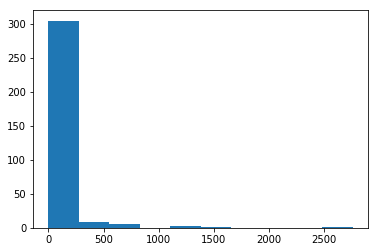

In [124]:
curr_limb_idx = "L0"
curr_branch_idx = 4

total_width_diff = []
limb_branch_order = []
for curr_limb_idx in uncompressed_neuron_revised.get_limb_node_names():
    for curr_branch_idx in uncompressed_neuron_revised.get_branch_node_names(curr_limb_idx):
        ex_branch =  uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]
        width_diff = np.abs(ex_branch.width_new["no_spine_average"]
                            - ex_branch.width_new["no_spine_average_mesh_center"])
        total_width_diff.append(width_diff)
        limb_branch_order.append([curr_limb_idx,curr_branch_idx])

plt.hist(total_width_diff)

In [132]:
curr_data = total_width_diff
curr_data_name = "width_difference"

curr_data = np.array(curr_data)
limb_branch_order = np.array(limb_branch_order)
arg_sorted_curr_data = np.flip(np.argsort(curr_data))
ordered_curr_data = curr_data[arg_sorted_curr_data]
ordered_limb_branch = limb_branch_order[arg_sorted_curr_data]

index = 1

curr_limb_idx,curr_branch_idx = ordered_limb_branch[index]
print(curr_limb_idx,curr_branch_idx)
ex_branch =  uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]


print(f"{curr_data_name} = {ordered_curr_data[index]}")
print(f"no_spine_average = {ex_branch.width_new['no_spine_average']}\n"
          f"no_spine_average_mesh_center = {ex_branch.width_new['no_spine_average_mesh_center']}\n")


curr_branch = uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]

import skeleton_utils as sk
sk.graph_skeleton_and_mesh(other_meshes=[curr_branch.mesh],
                           other_skeletons=[curr_branch.skeleton],
                          other_meshes_colors=["red"])

L5 9
width_difference = 1507.5990823685788
no_spine_average = 1652.1381430847805
no_spine_average_mesh_center = 144.5390607162016



In [139]:
neuron = reload(neuron)
uncompressed_neuron_revised= neuron.Neuron(uncompressed_neuron_revised)

Recieved another instance of Neuron class in init -- so just copying data


# Trying the query again but with the new mesh center width

In [210]:
#Making sure the function_kwargs works
import neuron_searching as ns
ns = reload(ns)
current_functions_list = [
    "spines_per_skeletal_length",
    "no_spine_average_mesh_center",
    "n_spines",
    "n_faces_branch",
    
]

limb_branch_dict = ns.query_neuron(uncompressed_neuron_revised,
                                   query="n_spines < 4 and no_spine_average_mesh_center < 400",
               functions_list=current_functions_list)
#print(F"limb_branch_dict BEFORE = {limb_branch_dict}")

#How to give a limb_branch_dict as an argument
current_functions_list = ["axon_segment",
                        "spines_per_skeletal_length",
                        "no_spine_average_mesh_center",
                        "n_spines",
                        "n_faces_branch"]
limb_branch_dict_filtered = ns.query_neuron(uncompressed_neuron_revised,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                       print_flag=False),
                                   functions_list=current_functions_list)


#print(F"limb_branch_dict AFTER = {limb_branch_dict_filtered}")


nviz.visualize_neuron(uncompressed_neuron_revised,
                      visualize_type=["mesh"],
                     limb_branch_dict=limb_branch_dict_filtered,
                      mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)

limb_branch_dict BEFORE = {'L0': array([ 1,  4,  5,  6,  7,  8, 10, 11, 13, 14, 16, 24, 26, 27, 29, 31, 35,
       36, 37, 40, 44, 55, 58, 64, 66, 68, 70, 71]), 'L1': array([ 1,  3,  5,  6,  8, 13, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29,
       36, 39, 41, 43, 44, 46, 47, 49, 50, 51, 52]), 'L2': array([ 3,  4,  9, 12, 13, 15, 17, 18, 19, 21, 23, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 45, 47]), 'L3': array([ 4,  6,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 27, 28, 29,
       32, 33, 36, 38]), 'L4': array([ 1,  3,  6,  8, 12, 14, 15, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 34]), 'L5': array([2, 4, 6, 8, 9]), 'L6': array([ 0,  6,  8, 12, 14]), 'L7': array([ 3,  5,  6,  9, 11, 14, 15, 16, 18, 20, 21, 23, 24]), 'L8': array([0, 1, 2, 6, 7, 8]), 'L9': array([0, 1, 2, 3, 4])}
limb_branch_dict AFTER = {'L0': array([ 1,  4,  6,  7, 10, 11, 13, 14, 16, 24, 26, 27, 29, 31, 35, 36, 37,
       40, 44, 55, 58, 64, 66, 68, 70, 71]), 'L1': ar

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


# Seeing the largest width segments

(array([15., 44., 42., 16.,  7.,  5.,  3.,  6.,  3.,  4.]),
 array([ 31.29868065,  58.17017407,  85.04166748, 111.9131609 ,
        138.78465432, 165.65614773, 192.52764115, 219.39913456,
        246.27062798, 273.1421214 , 300.01361481]),
 <a list of 10 Patch objects>)

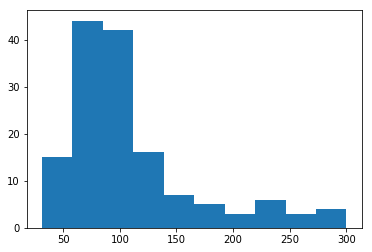

In [211]:
total_width_diff = []
limb_branch_order = []
for curr_limb_idx in limb_branch_dict_filtered.keys():
    for curr_branch_idx in limb_branch_dict_filtered[curr_limb_idx]:
        ex_branch =  uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]
        
        total_width_diff.append(ex_branch.width_new["no_spine_average_mesh_center"])
        limb_branch_order.append([curr_limb_idx,curr_branch_idx])

plt.hist(total_width_diff)

In [222]:
current_functions_list = ["axon_segment",
                        "spines_per_skeletal_length",
                        "no_spine_average_mesh_center",
                          "no_spine_width",
                          "width",
                        "n_spines",
                        "n_faces_branch"
                         ]

limb_branch_dict_filtered_df = ns.query_neuron(uncompressed_neuron_revised,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                       print_flag=False),
                                   functions_list=current_functions_list,
                                              return_dataframe=True)

In [430]:
limb_branch_dict_filtered_df

,limb,node,axon_segment,spines_per_skeletal_length,no_spine_average_mesh_center,no_spine_width,width,n_spines,n_faces_branch
4,L0,27,True,0.000000,115.932365,145.430238,397.370617,0,1623
7,L0,14,True,0.000000,90.960031,115.535561,319.593759,0,2869
11,L0,70,True,0.000064,66.605269,88.929509,456.679414,2,1597
12,L0,71,True,0.000306,272.506660,281.783192,1070.022522,3,1388
17,L0,13,True,0.000000,116.289333,145.322670,498.101620,0,1037
...,...,...,...,...,...,...,...,...,...
319,L9,1,True,0.000026,242.756636,247.305937,574.360318,1,3823
320,L9,2,True,0.000000,191.545981,197.076568,417.789448,0,1323
321,L9,4,True,0.000000,122.351243,129.657682,279.264775,0,500
322,L9,0,True,0.000000,76.481489,96.100229,212.935794,0,918


In [255]:
curr_data = total_width_diff
curr_data_name = "no_spine_average_mesh_center"

curr_data = np.array(curr_data)
limb_branch_order = np.array(limb_branch_order)
arg_sorted_curr_data = np.flip(np.argsort(curr_data))
ordered_curr_data = curr_data[arg_sorted_curr_data]
ordered_limb_branch = limb_branch_order[arg_sorted_curr_data]

index = 40

curr_limb_idx,curr_branch_idx = ordered_limb_branch[index]
print(curr_limb_idx,curr_branch_idx)
ex_branch =  uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]


print(f"{curr_data_name} = {ordered_curr_data[index]}")
print(#f"no_spine_average = {ex_branch.width_new['no_spine_average']}\n"
          #f"no_spine_average_mesh_center = {ex_branch.width_new['no_spine_average_mesh_center']}\n"
)


curr_branch = uncompressed_neuron_revised.concept_network.nodes[curr_limb_idx]["data"].concept_network.nodes[int(curr_branch_idx)]["data"]

import skeleton_utils as sk
sk.graph_skeleton_and_mesh(
    #main_mesh_verts=uncompressed_neuron_revised.mesh.vertices,
    #main_mesh_faces=uncompressed_neuron_revised.mesh.faces,
                            other_meshes=[curr_branch.mesh],
                           other_skeletons=[curr_branch.skeleton],
                          other_meshes_colors=["red"])

limb_branch_dict_filtered_df.loc[(limb_branch_dict_filtered_df["limb"]==curr_limb_idx) & 
                                (limb_branch_dict_filtered_df["node"]==int(curr_branch_idx))]

L4 15
no_spine_average_mesh_center = 117.7912467333835



/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


,limb,node,axon_segment,spines_per_skeletal_length,no_spine_average_mesh_center,no_spine_width,width,n_spines,n_faces_branch
242,L4,15,True,0.0,117.791247,140.171682,315.490097,0,942


# New idea on how to make better

In [ ]:
"""
If the preceeding neighbor had similar width then it is not an axon

Ex: L0 71

"""

In [259]:
import networkx_utils as xu
curr_limb_obj = uncompressed_neuron_revised.concept_network.nodes["L0"]["data"]
xu.upstream_edges_neighbors(curr_limb_obj.concept_network_directional,71)

[(56, 71, 'reverse')]

In [305]:
curr_limb_obj = uncompressed_neuron_revised.concept_network.nodes["L0"]["data"]
for n in curr_limb_obj.concept_network.nodes():
    print(f"---n={n}---")
    curr_upstream_node = xu.upstream_edges_neighbors(curr_limb_obj.concept_network_directional,n)
    if len(curr_upstream_node) > 0:
        if len(curr_upstream_node) > 1:
            raise Exception()
        print(curr_upstream_node[0][:-1])
        print(curr_upstream_node[0][0])

---n=46---
---n=28---
(46, 28)
46
---n=47---
(46, 47)
46
---n=21---
(28, 21)
28
---n=27---
(28, 27)
28
---n=53---
(47, 53)
47
---n=56---
(47, 56)
47
---n=14---
(21, 14)
21
---n=20---
(21, 20)
21
---n=57---
(53, 57)
53
---n=59---
(53, 59)
53
---n=70---
(56, 70)
56
---n=71---
(56, 71)
56
---n=17---
(20, 17)
20
---n=18---
(20, 18)
20
---n=52---
(57, 52)
57
---n=60---
(57, 60)
57
---n=13---
(17, 13)
17
---n=15---
(17, 15)
17
---n=51---
(52, 51)
52
---n=58---
(52, 58)
52
---n=39---
(60, 39)
60
---n=61---
(60, 61)
60
---n=12---
(15, 12)
15
---n=16---
(15, 16)
15
---n=25---
(51, 25)
51
---n=49---
(51, 49)
51
---n=63---
(61, 63)
61
---n=64---
(61, 64)
61
---n=9---
(12, 9)
12
---n=11---
(12, 11)
12
---n=19---
(25, 19)
25
---n=24---
(25, 24)
25
---n=48---
(49, 48)
49
---n=54---
(49, 54)
49
---n=55---
(63, 55)
63
---n=65---
(63, 65)
63
---n=8---
(9, 8)
9
---n=10---
(9, 10)
9
---n=42---
(48, 42)
48
---n=50---
(48, 50)
48
---n=45---
(54, 45)
54
---n=62---
(54, 62)
54
---n=5---
(8, 5)
8
---n=7---
(8

In [275]:
np.mean(curr_limb_obj.concept_network.nodes[56]["data"].width_array["no_spine_average_mesh_center"][-3:-1])

296.7689501033343

In [308]:
end_2 = curr_limb_obj.concept_network.nodes[71]["data"].endpoints

In [309]:
end_1 = curr_limb_obj.concept_network.nodes[56]["data"].endpoints

In [276]:
np.mean(curr_limb_obj.concept_network.nodes[71]["data"].width_array["no_spine_average_mesh_center"][1:3])

275.86602475316874

In [315]:
ex_match = np.vstack([end_1,end_2])
ex_match[2,:] = [1,2,3]

In [316]:
import numpy_utils as nu
match_vertices = nu.get_matching_vertices(np.vstack([end_1,end_2]))

match_vertices = nu.get_matching_vertices(ex_match)
len(match_vertices)

0

# Developing the mesh_width_array_border function

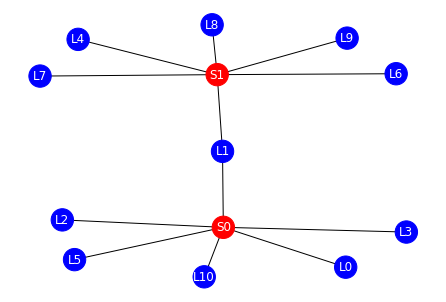

In [327]:
uncompressed_neuron_revised.plot_soma_limb_concept_network()

In [381]:
curr_limb_obj.concept_network.nodes[5]

{'endpoints': array([[ 557593., 1026300.,  902856.],
        [ 560107., 1023990.,  902086.]]),
 'data': <neuron.Branch at 0x7fa7ae7795f8>}

In [332]:
sk.calculate_skeleton_distance(curr_limb_obj.concept_network.nodes[56]["data"].skeleton)/1000
len(curr_limb_obj.concept_network.nodes[56]["data"].width_array["no_spine_average_mesh_center"])

83

# Developing the function that will use mesh_width_array_border to determine if axon segment should be kept an axon segment

n = 0, upstream_node= 2
Skipping because the upstream node is not a non-axon piece
n = 2, upstream_node= 1
Skipping because the upstream node is not a non-axon piece
n = 3, upstream_node= 2
Skipping because the upstream node is not a non-axon piece
n = 4, upstream_node= 1
Skipping because the upstream node is not a non-axon piece
total_non_axon_nodes = set()


In [414]:
nviz = reload(nviz)
nviz.visualize_neuron(uncompressed_neuron_revised,
                     visualize_type=["mesh"],
                     limb_branch_dict=dict(L7=[6]),
                     mesh_color="red",
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [271]:
curr_limb_obj.concept_network.nodes[70]["data"].width_array["no_spine_average_mesh_center"]

array([ 66.60526919,  66.60526919,  66.60526919,  66.60526919,
        66.60526919,  66.60526919,  93.89601212, 126.29796421,
        99.14231034,  64.20064367, 128.122618  , 145.45364683,
        88.4561768 , 130.65349737, 124.47247953,  82.24170446,
        74.34230074,  93.05681575, 103.90513801, 110.62818631,
       112.13654841, 119.52318914,  56.52174778,  72.31612983,
       129.02070986,  87.56438193,  89.41641313,  66.60526919,
        66.60526919,  66.60526919,  66.60526919,  66.60526919])

In [269]:
xu.downstream_edges_neighbors(curr_limb_obj.concept_network_directional,56)

[(56, 70), (56, 71)]

In [261]:
nviz = reload(nviz)
nviz.visualize_neuron(uncompressed_neuron_revised,
                      visualize_type=["mesh"],
                     limb_branch_dict=dict(L0=[71,56]),
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


In [182]:
"""
How could I make querying better


"""

,limb,node,axon_segment
12,L0,71,True


In [ ]:
#problem ones we need to look at 
"""
4: L2 48
5: L0 49


"""

# Putting all the queries together on how to identify the axonal pieces (with the new mesh transition)

In [466]:
mt = reload(mt)
mt.practice_tqdm()
mt.global_disable = True
mt.practice_tqdm()

In [479]:
import module_test 
module_test = reload(module_test)
from module_test import tqdm
tqdm.disable
print("disabling the tqdm")
tqdm.disable=True
module_test.practice_tqdm()
print("enabling the tqdm")
tqdm.disable=False
module_test.practice_tqdm()

# from module_test import tqdm
# tqdm = reload(tqdm)
# mt.global_disable=False
# for i in tqdm(range(0,10000)):
#     i

disabling the tqdm
enabling the tqdm


In [484]:
tqdm.disable=False
module_test.practice_tqdm()
tqdm.disable=True
module_test.practice_tqdm()

In [446]:
from tqdm.notebook import tqdm

In [448]:
for i in tqdm(range(1000),disable=True):
    i + 5

In [453]:
mt.global_disable=False
mt.practice_tqdm()

In [455]:
tqdm.disable()

AttributeError: type object 'tqdm_notebook' has no attribute 'disable'

In [454]:
import sys
sys.modules.keys()

dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.ascii', '_signal', '__main__', 'encodings.utf_8', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'ruamel', 'sitecustomize', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', '

In [451]:
import module_test as mt
mt = reload(mt)


In [489]:
from tqdm_utils import tqdm

True

In [494]:
#Making sure the function_kwargs works
import neuron_searching as ns
import tqdm_utils as tqu
tqu = reload(tqu)
ns = reload(ns)
nru = reload(nru)
cu = reload(cu)

In [499]:
su = reload(su)

In [500]:
tqu.turn_on_tqdm()

current_functions_list = [
    "spines_per_skeletal_length",
    "no_spine_average_mesh_center",
    "n_spines",
    "n_faces_branch",
    
]


with su.suppress_stdout_stderr():
    limb_branch_dict = ns.query_neuron(uncompressed_neuron_revised,
                                       query="n_spines < 4 and no_spine_average_mesh_center < 400",
                   functions_list=current_functions_list)
    #print(F"limb_branch_dict BEFORE = {limb_branch_dict}")

    #How to give a limb_branch_dict as an argument
    current_functions_list = ["axon_segment"]
    limb_branch_dict_upstream_filter = ns.query_neuron(uncompressed_neuron_revised,
                                       query="axon_segment==True",
                                       function_kwargs=dict(limb_branch_dict =limb_branch_dict,
                                                            downstream_face_threshold=3000,
                                                            width_match_threshold=50,
                                                           print_flag=False),
                                       functions_list=current_functions_list)

    # current_functions_list = ["axon_segment_clean_false_positives"]
    # limb_branch_dict_mesh_transition_matching = ns.query_neuron(uncompressed_neuron_revised,
    #                                    query="axon_segment_clean_false_positives==True",
    #                                    function_kwargs=dict(limb_branch_dict =limb_branch_dict_upstream_filter,
    #                                                         width_match_threshold=50,
    #                                                        print_flag=False),
    #                                    functions_list=current_functions_list)



    #print(F"limb_branch_dict AFTER = {limb_branch_dict_filtered}")


In [439]:

nviz = reload(nviz)
nviz.visualize_neuron(uncompressed_neuron_revised,
                      visualize_type=["mesh"],
                     limb_branch_dict=limb_branch_dict_mesh_transition_matching,
                      mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)


 Working on visualization type: mesh


In [501]:
ex_branch = uncompressed_neuron_revised.concept_network.nodes["L1"]["data"].concept_network.nodes[0]["data"]
ex_branch.width_array

{'no_spine_average': array([372.75437324, 328.64377553, 148.11267103, 235.88908257,
        237.72764699, 175.76123199, 215.93820724, 386.47661501,
        327.90467202, 191.90625293, 129.58133538, 189.7049377 ,
        360.70651848, 308.36163671, 245.44215651, 309.91280024,
        273.02297591, 207.28745859, 130.41295143, 370.1637702 ,
        212.90529696, 247.40015838, 306.86701654, 238.35984494,
        151.43830001, 447.81376663, 274.39246255, 142.71216301,
        187.30387521, 229.30420152, 188.57875627, 210.25282697,
        143.19435823, 220.03304347, 374.6692225 , 514.84399019,
        244.41003929, 189.60409336, 348.3049448 , 213.76177858,
        201.44191234, 303.3096528 , 229.40138204, 194.83332352,
        128.80936243, 232.57096852, 330.33822644, 330.57582023,
        250.42098842, 446.23522378, 476.80729782, 292.78751488,
        229.25834441, 480.32121572, 260.09126987, 213.98734592,
        167.91085773, 225.03117827, 303.33491583, 212.49090954,
        149.84483506